農研機構メッシュ農業気象データシステム(AMGSDS) 　ドキュメント<br>
チュートリアル　６ CSVファイルの読み書き

# CSVファイルの読み書き
　このチュートリアルでは、メッシュ農業気象データやその処理結果を CSV ファイルに書き出す方法と、CSVファイルにまとめられたデータをプログラムに読み込む方法を学習します。

　まず、以下のセルを実行し、このチュートリアルで使用するライブラリを読み込んでください。

In [1]:
# このチュートリアルで使用するライブラリ

import numpy as np
import pandas as pd
import AMD_Tools4 as amd

## 1 ３次メッシュコードを見出しとするデータの書き出し
　メッシュデータの配列を表として表現する方法の一つとして、配列要素値を以下のような１行の文字列にして、メッシュの数だけ縦に並べる方法があります。
 
　　_３次メッシュコード_ , _データ_<br>
 
　この方法は、メッシュの数だけ行が作られ冗長に見えるかもしれませんが、２次元配列にも３次元配列にも対応でき、GIS とも相性が良い方法です。このようなCSVファイルは、ライブラリ AMD_Tools4 が提供する関数 **PutCSV_MT** で作ることができます。

```python
AMD_Tools4.PutCSV_MT(data, lat, lon, addlalo=False, header=None, 
                     filename='result.csv', removenan=True, delimiter=',')
```
引数(必須)：<br>
* **data**： 出力しようとする2次元(緯度,経度)、または３次元(任意,緯度,経度)の配列
* **lat**： 出力しようとする配列の緯度座標の配列
* **lon**： 出力しようとする配列の経度座標の配列
  
引数(必要なときだけ使用)：<br>
* **addlalo**: 基準3次メッシュコードに加え、当該メッシュの緯度経度値も書き出したい場合にTrueを指定する。省略した場合は出力されない。
* **header**: テーブルの上に見出しを追加したいときにその文字列を指定する。指定した文字列が先頭に挿入される。
* **filename**: 出力されるファイル名を指定するときに使用する。省略した場合は「result.csv」となる。
* **removenan**: 海上など、当該要素の値が無効値であっても、その基準３次メッシュコードの書き出しをするときにFalseを指定する。省略した場合は無効値だけの３次メッシュのデータは書き出さない。
* **delimiter**: データ間の区切り文字を、カンマ「','」以外に設定したいときに使用する。

戻り値：なし

　使用する際には、ライブラリ **AMD_Tools4** を事前にインポートしておきます。

#### 例１
　高知県の室戸岬先端周辺の、下図に示す 30 メッシュの領域の、2024年6月1日の日平均気温データ(２次元)を、この形式で CSV ファイルとして書き出す。

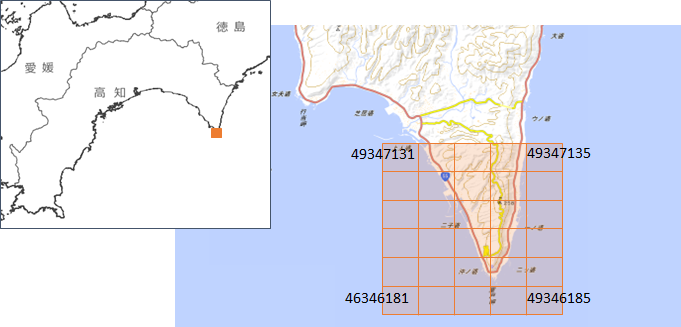

　まず、気象データを取得しましょう。

In [2]:
# 変数に取得条件を設定
nani = 'TMP_mea'                         #気象要素の指定。TMP_meaは日平均気温を意味します。
itsu = ['2024-06-01', '2024-06-01']         #期間の設定。
doko = [33.2375, 33.2792, 134.1437, 134.1938]    #領域の設定。室戸岬の先端あたりです。

# 設定に基づき気象データを取得
data, tim, lat, lon = amd.GetMetData(nani, itsu, doko)
print(data)

TMP_mea (1, 6, 5) Tile
[[[      nan       nan       nan       nan       nan]
  [      nan       nan 20.300001 20.300001       nan]
  [      nan       nan 20.2      20.             nan]
  [      nan 20.6      20.2      19.9            nan]
  [      nan 20.6      20.       19.9            nan]
  [      nan 20.4      19.7      19.9            nan]]]


　それでは、関数 **PutCSV_MT** を使ってこれを CSV ファイルにします。

In [3]:
# CSVファイルへの書き出し
amd.PutCSV_MT(data, lat, lon, filename='t6c1ex1.csv')

　作られたファイルを表計算ソフト等で開き、内容が以下のようになっていることを確認してください。
 
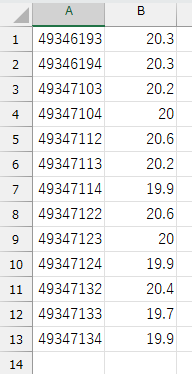

　関数 PutCSV_MT は、デフォルトでは値が無効値の要素については行を書き出しません。今回、取得したデータは、総数は30メッシュですが、データが存在するのはそのうち13メッシュなので、書き出されるのも13行だけとなっています。全ての要素を書き出したい場合は、引数に「 **removenan=False** 」を追加してください。

#### 例２
　高知県の室戸岬先端周辺の、下図に示す 30 メッシュの領域の、2024年6月1日～6月3日の日平均気温データ(３次元)を、3次メッシュコードをキーとする CSV ファイルとして書き出す。<br>
　その際、各メッシュの中心緯度と中心経度も出力に加えるとともに、最初の行に見出しを追加する。

In [4]:
# 変数に取得条件を設定
nani = 'TMP_mea'                         #気象要素の指定。TMP_meaは日平均気温を意味します。
itsu = ['2024-06-01', '2024-06-03']         #期間の設定。
doko = [33.2375, 33.2792, 134.1437, 134.1938]    #領域の設定。室戸岬の先端あたりです。

# 設定に基づき気象データを取得
data, tim, lat, lon = amd.GetMetData(nani, itsu, doko)

TMP_mea (3, 6, 5) Tile


In [5]:
# 列見出しの作成
dates = [d.strftime('%Y-%m-%d') for d in tim]
header = 'MeshCode, latitude, longitude, ' + ', '.join(dates)

# CSVファイルへの書き出し
amd.PutCSV_MT(data, lat, lon, addlalo=True, header=header, filename='t6c1ex2.csv')

作られたファイルを表計算ソフト等で開き、内容が以下のようになっていることを確認してください。

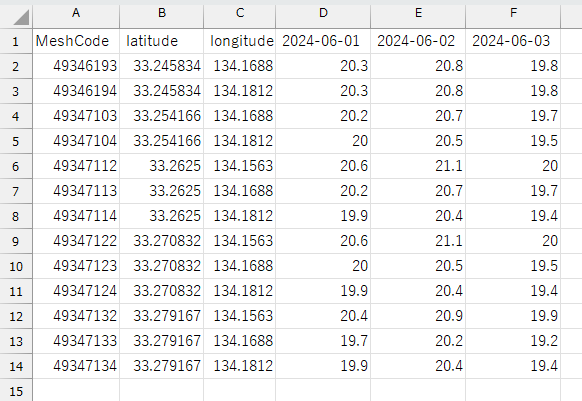

**参考：** <br>
　このCSVファイルをGISにインポートするには、属性値が３次メッシュコード、形状が３次メッシュの外郭であるポリゴンデータをあらかじめ用意し、その属性(３次メッシュコード)と、CSVファイルをインポートしてできたテーブルの'MeshCode'を結合します。<br>
　インポートは、このほかに、NetCDFファイルを介する方法やGeoTIFFファイルを介する方法でも可能です。メッシュデータをXarray.DataArrayオブジェクトにまとめたうえでメソッド **to_netcdf** を使用すると、メッシュデータのNetCDFファイルを作ることができます。そして、AMD_Tools4の関数 **PutGeoTIFF** を使用すると、メッシュデータのGeoTIFFファイルを作成することができます。

## 2 特定メッシュにおける時系列データの書き出し
　特定のメッシュにおけるデータの時系列を CSV ファイルに書き出すときには、特定の時刻(日付)のデータを以下のような１行の文字列にして、日付の数だけ縦に並べる方法が一般的に用いられます。

　　　 _日付_ , _データ_

　このような CSV ファイルは、Pythonのライブラリ **pandas** の力を借りると効率的に作成できます。

　ライブラリ **pandas** （チュートリアル３「pandasの基礎」参照のこと）では、表形式のデータを取り扱うための大変ポピュラーなライブラリで、 **DataFrame** と呼ばれる便利なオブジェクトを提供します。これを使い、以下の流れでファイルを作ります。
 
メッシュデータの配列　→　DataFrameオブジェクト　→　CSVファイル
 

#### 例
　愛知県名古屋市の、名古屋地方気象台の地点を含むメッシュにおける2024年6月1日～10日の日平均気温、日平均湿度、日積算降水量をCSVファイルに出力する。

　まず気象データを取得し、1次元配列に整形します。

In [6]:
# 変数に取得条件を設定
nanis = ['TMP_mea', 'RH', 'APCP']
itsu = [ "2024-06-01", "2024-06-10" ]
doko = [ 35.1666, 35.1666, 136.965, 136.965 ]  # 名古屋地方気象台

# 設定に基づき気象データを取得
data, tim, lat, lon = amd.GetMetData(nanis[0], itsu, doko)
Ta = data[:,0,0]
data, tim, lat, lon = amd.GetMetData(nanis[1], itsu, doko)
RH = data[:,0,0]
data, tim, lat, lon = amd.GetMetData(nanis[2], itsu, doko)
Pr = data[:,0,0]

print(Ta)
print(RH)
print(Pr)

TMP_mea (10, 1, 1) Tile
RH (10, 1, 1) Tile
APCP (10, 1, 1) Tile
[21.5      20.4      20.9      21.4      22.5      23.       23.800001
 23.6      21.       22.9     ]
[62.100002 75.1      57.       56.       59.       64.1      59.
 61.       80.1      74.1     ]
[ 0.  11.1  0.   0.   0.   0.   0.   0.   6.   4.5]


　次に、これらの配列を結合したうえで、日付情報も加えて DataFrame オブジェクトに纏めます。

In [7]:
# データを pandas.DataFrameオブジェクトにまとめる
df = pd.DataFrame(np.array([Ta,RH,Pr]).T, dtype=np.float32,
                  columns = nanis,
                  index = tim,
                  )
df

,TMP_mea,RH,APCP
2024-06-01,21.500000,62.100002,0.0
2024-06-02,20.400000,75.099998,11.1
2024-06-03,20.900000,57.000000,0.0
2024-06-04,21.400000,56.000000,0.0
2024-06-05,22.500000,59.000000,0.0
2024-06-06,23.000000,64.099998,0.0
2024-06-07,23.800001,59.000000,0.0
2024-06-08,23.600000,61.000000,0.0
2024-06-09,21.000000,80.099998,6.0
2024-06-10,22.900000,74.099998,4.5


　最後に、これを CSV ファイルとして書き出します。

In [8]:
# CSVファイルへの書き出し
df.to_csv('t6c2ex.csv')

　作られたファイルを表計算ソフト等で開き、内容を確認してください。
 
　この例では、時系列データの出力として、オブジェクト DataFrame とそのメソッドである **to_csv** を紹介しましたが、すでにお気づきの通り、DataFrame に纏めてありさえすればどのようなデータも CSV ファイルとして出力できます。

## 3 CSVファイルの読み込み
　CSVファイルの読み込みも、ライブラリ **pandas** で簡単に行えます。

#### 例
　水稲栽培試験の栽培条件の一覧をまとめたファイル「 **CSVファイルの読み書き_読み込みサンプル.csv** 」(下図)を読み込んで、DataFrameオブジェクトを生成する。

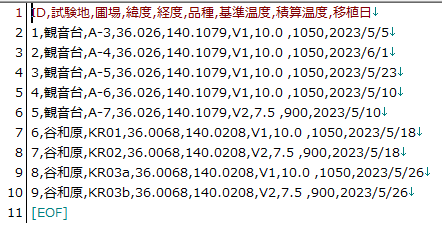

　ライブラリ **pandas** の関数 **read_csv** を使うと、CSV ファイルの内容を簡単に **DataFrame** として取り込むことができます。

In [9]:
# 読み込み
xp = pd.read_csv("6_CSVファイルの読み書き_読み込みサンプル.csv",       # ファイル名
                 encoding="Shift_JIS",    # 文字コード（Excelやネットから取得したものはほぼシフトJIS）
                 parse_dates=["移植日"],  # 日付と理解できる文字列は日付と見なす
                )
xp

,ID,試験地,圃場,緯度,経度,品種,基準温度,積算温度,移植日
0,1,観音台,A-3,36.0260,140.1079,V1,10.0,1050,2023-05-05
1,2,観音台,A-4,36.0260,140.1079,V1,10.0,1050,2023-06-01
2,3,観音台,A-5,36.0260,140.1079,V1,10.0,1050,2023-05-23
3,4,観音台,A-6,36.0260,140.1079,V1,10.0,1050,2023-05-10
4,5,観音台,A-7,36.0260,140.1079,V2,7.5,900,2023-05-10
5,6,谷和原,KR01,36.0068,140.0208,V1,10.0,1050,2023-05-18
6,7,谷和原,KR02,36.0068,140.0208,V2,7.5,900,2023-05-18
7,8,谷和原,KR03a,36.0068,140.0208,V1,10.0,1050,2023-05-26
8,9,谷和原,KR03b,36.0068,140.0208,V2,7.5,900,2023-05-26


DataFrame オブジェクトに対しては、様々な操作が可能ですが、最も基礎的な、特定のデータの取り出しは、インデックス（最も左の列の値）と列名を用いて下のようにして行います。

In [10]:
xp['移植日'][5]

Timestamp('2023-05-18 00:00:00')

　DataFrame オブジェクトの操作方法については、チュートリアル３「Pandasの基礎」で学習してください。pandas のサイト等にも解説が多数あるので必要に応じ参照してください。

以上で、チュートリアル６「CSVファイルの読み書き」は終わりです。　お疲れさまでした。